In [1]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

from string import punctuation
from itertools import chain
import nltk
import re
import pandas as pd
import numpy as np
import random

data= pd.read_csv("Reviews.csv")
df = data[data['Score']!=3]


In [2]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)

In [4]:
df = df[df.HelpfulnessNumerator<=df.HelpfulnessDenominator]

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import  WordNetLemmatizer
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')
def clean_tags(sen):
    clean=re.compile('<.*?>')
    cleaned=re.sub(clean,'',sen)
    return cleaned
def clean_punctuations(sen):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sen)
    cleaned = re.sub(r'[,|.|)|(|\|/]',r'',cleaned)
    return cleaned


In [6]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [8]:
df.Text

0         I bought several Vitality canned dog food prod...
1         Product arrived labeled Jumbo Salted Peanuts.....
2         This confection around centuries. It light, pi...
3         If looking secret ingredient Robitussin I beli...
4         Great taffy great price. There wide assortment...
                                ...                        
568449    Great sesame chicken..this good better restura...
568450    I'm disappointed flavor. The chocolate notes e...
568451    These stars small, give 10-15 one training ses...
568452    These BEST treats training rewarding dog good ...
568453    I satisfied ,product advertised, I use cereal,...
Name: Text, Length: 364171, dtype: object

In [7]:
i=0
strin=''
positive=[]
negative=[]
final_string=[]
s=''
for sent in df['Text'].values:
    filtered_sentences = []
    sent = clean_tags(sent)
    for a   in sent.split():
        for cleaned_words in clean_punctuations(a).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in  stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentences.append(s)
                    if(df['Score'].values)[i] ==1:
                        positive.append(s)
                    if(df['Score'].values)[i]==0:
                        negative.append(s)
                else:
                    continue
            else:
                continue
    strin = b" ".join(filtered_sentences)
    final_string.append(strin)
    i+=1          

In [8]:
df['Text']=final_string

In [11]:
print(df['Text'])

0         b'bought sever vital can dog food product foun...
1         b'product arriv label jumbo salt peanutsth pea...
2         b'confect around centuri light pillowi citrus ...
3         b'look secret ingredi robitussin believ found ...
4         b'great taffi great price wide assort yummi ta...
                                ...                        
568449    b'great sesam chickenthi good better restur ea...
568450    b'disappoint flavor chocol note especi weak mi...
568451    b'star small give one train session tri train ...
568452    b'best treat train reward dog good groom lower...
568453    b'satisfi product advertis use cereal raw vine...
Name: Text, Length: 364171, dtype: object


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
X_bow = bow.fit_transform(df['Text'])

In [10]:
Xtrain_bow, Xtest_bow, Y_train, Y_test = train_test_split(X_bow, df['Score'], test_size=0.25, random_state=12)

In [11]:
def plot_wordcloud(sentences, title):
    # create word cloud
    wordcloud = WordCloud(background_color='black',
                          max_words=200).generate(str(sentences))
    # plt params
    fig = plt.figure(figsize=[15,15])
    plt.axis('off')
    plt.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=1.4)
    plt.imshow(wordcloud)
    plt.show()
    
    return

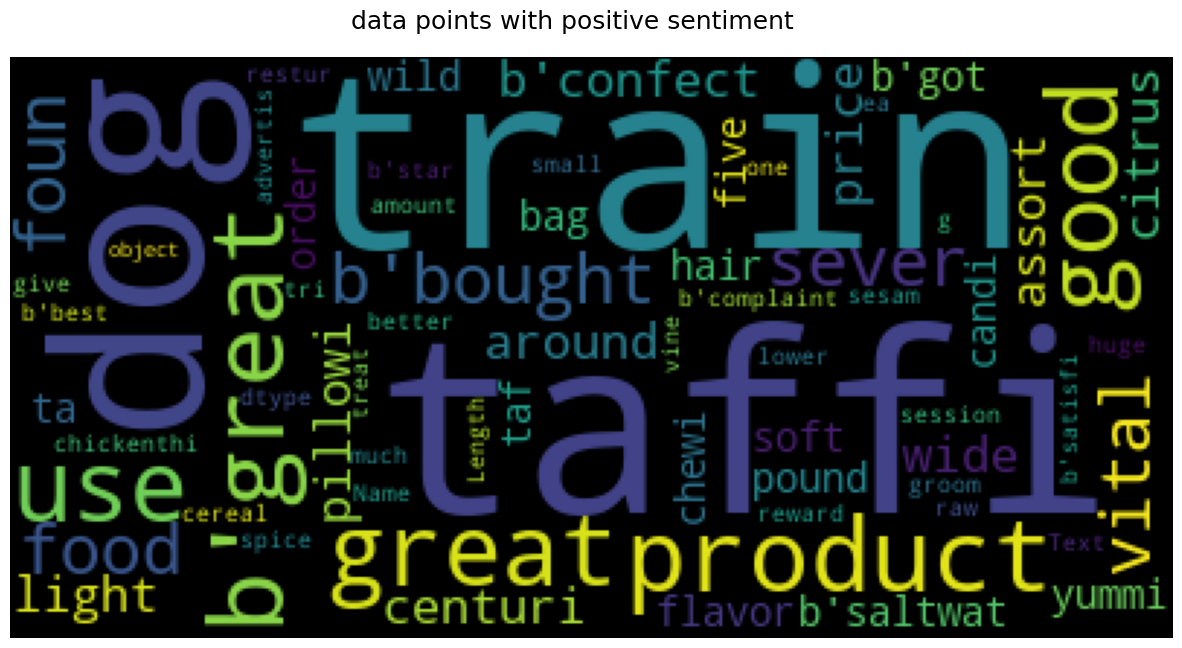

In [12]:

from matplotlib  import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#838267'
#plt.rcParams['axes.edgecolor'] = '#FFFFFF'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['ytick.labelsize'] = 14

# plt.rcParams['font.size'] = 16
plot_wordcloud(df[df['Score'] == 1]['Text'], 'data points with positive sentiment')

%matplotlib inline

tqdm.pandas()

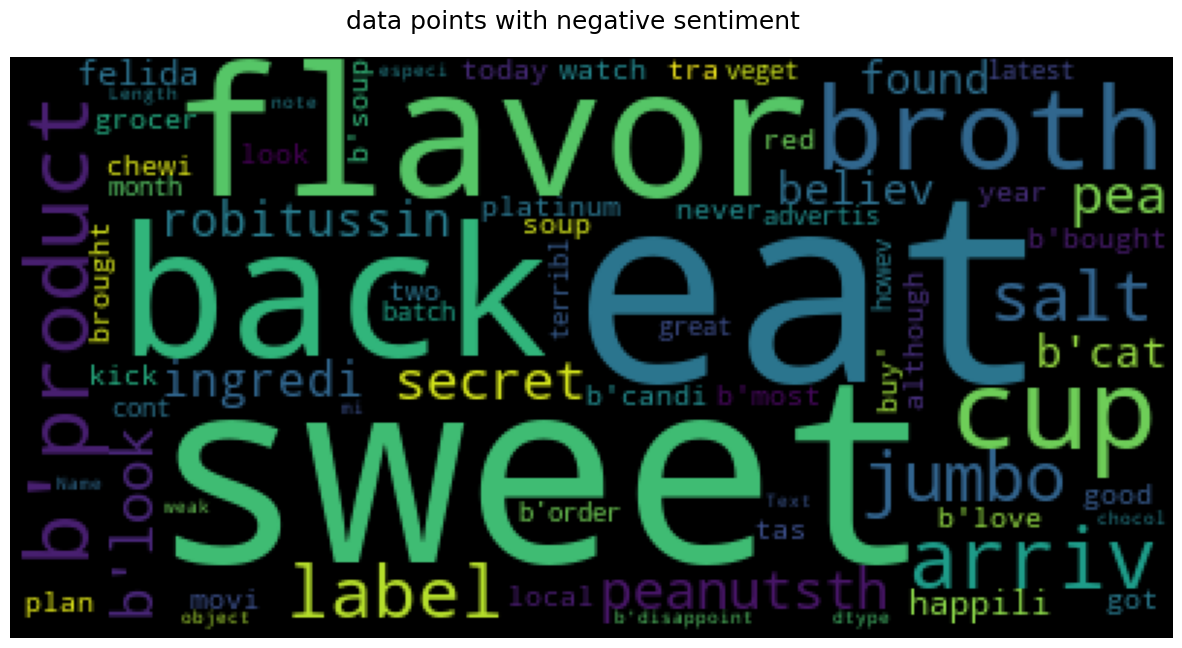

In [13]:
# plot word cloud for training data with negative examples
#to test the model for negative words
plot_wordcloud(df[df['Score'] == 0]['Text'], 'data points with negative sentiment')

TypeError: bar() missing 1 required positional argument: 'height'

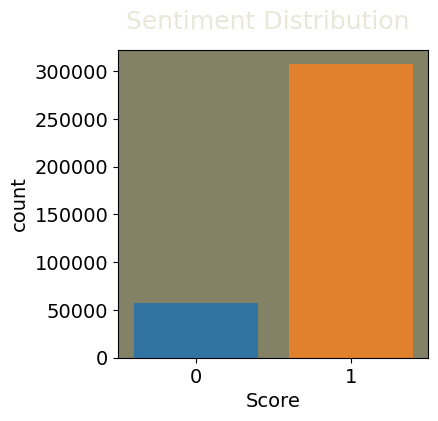

In [24]:
import seaborn 
fig = plt.figure(figsize=[4,4],)
plt.suptitle('Sentiment Distribution', fontsize=18,color="#e8e7d8")


ax = seaborn.countplot(data=df,x='Score')
plt.bar(data=df,x='Score',color=['black', 'red'])
ax.set_xticklabels(['negative', 'positive'])
plt.show()

In [14]:

def performance_summary(model, Xtrain, Xtest, Ytrain, Ytest):
    
    Ytrain_pred = model.predict(Xtrain)
    Ytest_pred = model.predict(Xtest)

    # model performance
    # accuracy score
    print('Training Accuracy:\n', accuracy_score(Ytrain, Ytrain_pred))
    print('\n')
    print('Test Accuracy:\n', accuracy_score(Ytest, Ytest_pred))
    print('\n')
    # classification report
    print('Classification Report training:\n', classification_report(Ytrain,Ytrain_pred))
    print('\n')
    print('Classification Report test:\n', classification_report(Ytest,Ytest_pred))
    conf_mat = confusion_matrix(Y_test, Ytest_pred)
    print(conf_mat)
    import seaborn as sns
    class_label = ["negative", "positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

In [32]:

from sklearn.model_selection import cross_val_score
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha

In [33]:
# 100k data which will use to train model after vectorization
X = df["Text"]
print("shape of X:", X.shape)

shape of X: (364171,)


In [34]:
# class label
y = df["Score"]
print("shape of y:", y.shape)

shape of y: (364171,)


In [35]:
# split data into train and test where 70% data used to train model and 30% for test
# final_4000[:int(len(final_4000) * 0.75)], final_4000[int(len(final_4000) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(254919,) (254919,) (109252,)


In [36]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_train

<254919x163056 sparse matrix of type '<class 'numpy.int64'>'
	with 7945032 stored elements in Compressed Sparse Row format>

In [37]:
# Test Vectorizor
x_test = bow.transform(x_test)

In [38]:
x_test.shape

(109252, 163056)


The optimal number of alpha is 1.


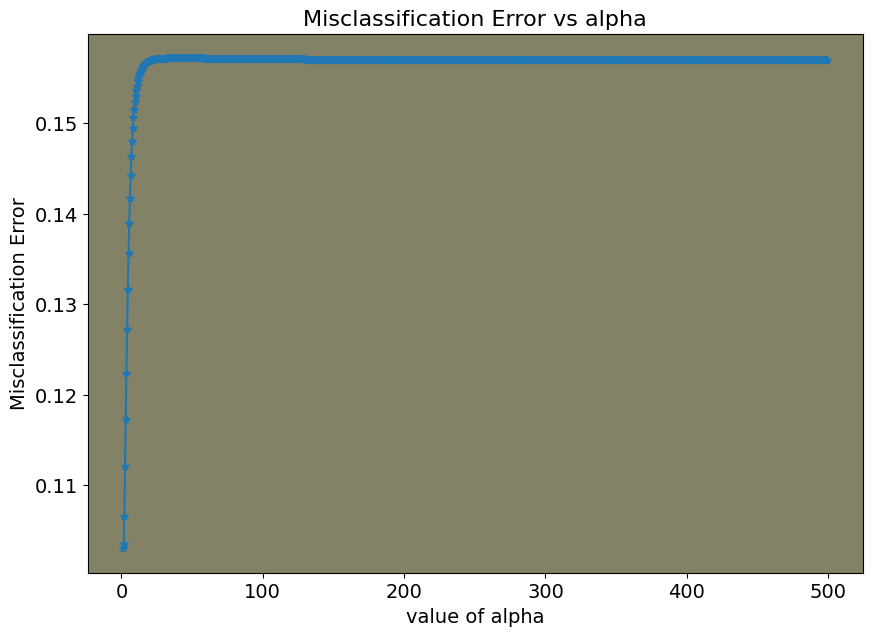

1.0

In [40]:
# To choose optimal_alpha using cross validation

optimal_alpha_bow = naive_bayes(X_train, y_train)
optimal_alpha_bow

In [19]:
lr_clf = GridSearchCV(LogisticRegression(),
                     cv=5,
                     param_grid={'C':[1e-2,1e-1,1,10,100]},
                     scoring='accuracy')

In [20]:
# train logistic regression model for bag of words
logreg_bow = LogisticRegression(C=1)
logreg_bow.fit(Xtrain_bow, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

*************************Bag of Words*************************
Training Accuracy:
 0.9393727483084854


Test Accuracy:
 0.9217622442142723


Classification Report training:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79     43051
           1       0.95      0.98      0.96    230077

    accuracy                           0.94    273128
   macro avg       0.91      0.85      0.88    273128
weighted avg       0.94      0.94      0.94    273128



Classification Report test:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72     14059
           1       0.94      0.97      0.95     76984

    accuracy                           0.92     91043
   macro avg       0.87      0.81      0.84     91043
weighted avg       0.92      0.92      0.92     91043

[[ 9236  4823]
 [ 2300 74684]]


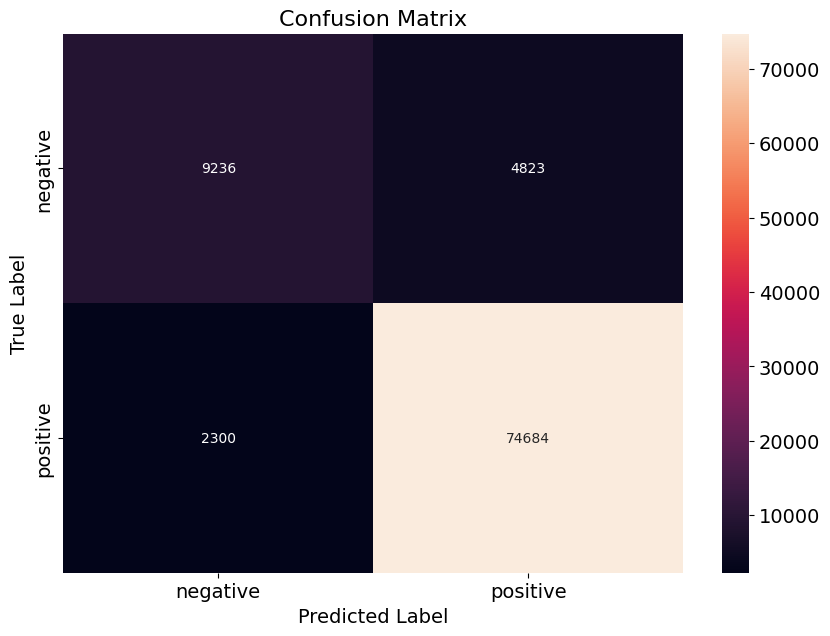

In [21]:
# model performance
print('*'*25+'Bag of Words'+'*'*25)
performance_summary(logreg_bow, Xtrain_bow, Xtest_bow, Y_train, Y_test)

In [22]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(Xtrain_bow, Y_train)
predictions = model.predict(Xtest_bow)
accuracy_score(Y_test , predictions)

0.8750260865744758

Training Accuracy:
 0.8734110014352245


Test Accuracy:
 0.8750260865744758


Classification Report training:
               precision    recall  f1-score   support

           0       0.88      0.23      0.36     43051
           1       0.87      0.99      0.93    230077

    accuracy                           0.87    273128
   macro avg       0.88      0.61      0.65    273128
weighted avg       0.87      0.87      0.84    273128



Classification Report test:
               precision    recall  f1-score   support

           0       0.88      0.22      0.35     14059
           1       0.87      0.99      0.93     76984

    accuracy                           0.88     91043
   macro avg       0.88      0.61      0.64     91043
weighted avg       0.88      0.88      0.84     91043

[[ 3124 10935]
 [  443 76541]]


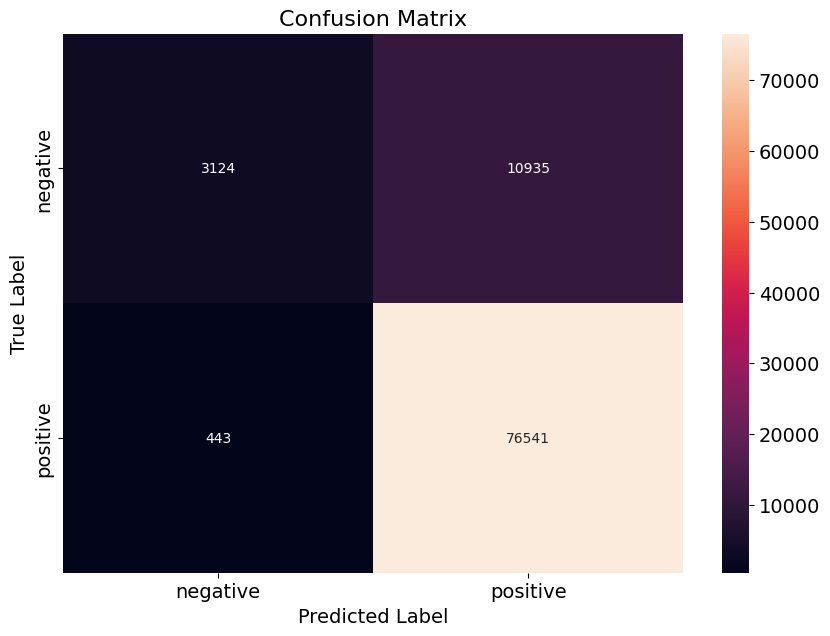

In [23]:
performance_summary(model, Xtrain_bow, Xtest_bow, Y_train, Y_test)